In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from PIL import Image, ImageOps
from tensorflow.keras.layers import DepthwiseConv2D

print(tf.__version__)

2.19.0


In [ ]:
import keras

keras.__version__

'3.10.0'

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
np.__version__

'2.0.2'

In [ ]:
class PatchedDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, groups=None, **kwargs):
        super().__init__(*args, **kwargs)

In [ ]:
with tf.keras.utils.custom_object_scope({'DepthwiseConv2D': PatchedDepthwiseConv2D}):
    model = load_model("/content/SDN5.h5", compile=False)

In [ ]:
labels_names = open("/content/sdn_labels.txt","r").readlines()

In [ ]:
labels_names

['0 Acne\n',
 '1 Eczema\n',
 '2 Psoriasis\n',
 '3 FU-ringworm\n',
 '4 BA- cellulitis\n',
 '5 BA-impetigo\n',
 '6 Warts\n',
 '7 Lupus\n',
 '8 SkinCancer\n',
 '9 chickenpox\n']

In [ ]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [ ]:
data

array([[[[140.32922,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         ...,
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ]],

        [[  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         ...,
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ]],

        [[  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         ...,
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ]],

        ...,

        [[  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         [  0.     ,   0.     ,   0.     ],
         ...,


In [ ]:
image = Image.open("/content/warts-common-79.jpeg")

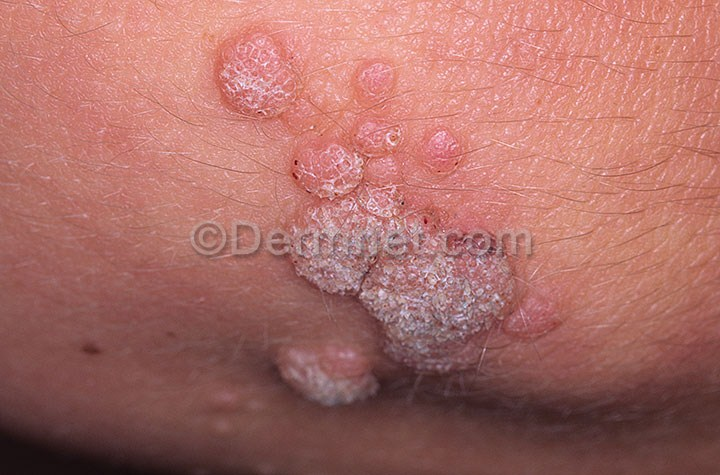

In [ ]:
image

In [ ]:
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

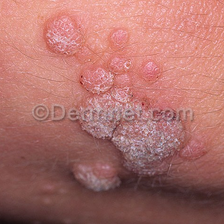

In [ ]:
image

In [ ]:
image_array = np.asarray(image)

normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

In [ ]:
normalized_image_array

array([[[ 0.75686276,  0.17647064,  0.07450986],
        [ 0.78039217,  0.1686275 ,  0.12941182],
        [ 0.77254903,  0.15294123,  0.09803927],
        ...,
        [ 0.75686276,  0.05098045,  0.01176476],
        [ 0.8117647 ,  0.09803927,  0.03529418],
        [ 0.67058825, -0.01176471, -0.15294117]],

       [[ 0.827451  ,  0.24705887,  0.15294123],
        [ 0.827451  ,  0.21568632,  0.1686275 ],
        [ 0.88235295,  0.27058828,  0.17647064],
        ...,
        [ 0.7411765 ,  0.05882359,  0.00392163],
        [ 0.6392157 , -0.04313725, -0.12156862],
        [ 0.73333335,  0.06666672, -0.06666666]],

       [[ 0.78039217,  0.22352946,  0.12941182],
        [ 0.827451  ,  0.254902  ,  0.16078436],
        [ 0.73333335,  0.11372554, -0.00392157],
        ...,
        [ 0.69411767,  0.04313731, -0.02745098],
        [ 0.75686276,  0.10588241,  0.01176476],
        [ 0.78039217,  0.12941182,  0.00392163]],

       ...,

       [[-0.7882353 , -0.8745098 , -0.8666667 ],
        [-0

In [ ]:
data[0]

array([[[140.32922,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ]],

       [[  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ]],

       [[  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ]],

       ...,

       [[  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        [  0.     ,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.  

In [ ]:
data[0] = normalized_image_array

prediction = model.predict(data)
index = np.argmax(prediction)
class_name = labels_names[index]
confidence_score = prediction[0][index]

print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Class: Psoriasis
Confidence Score: 0.95920825


In [ ]:
model.save("saved_model.keras")

In [ ]:
model.save("model.h5")